In [2]:
import pandas as pd
import numpy as np
import os

In [4]:
df = pd.read_csv('soil_data2009-2018.csv')

In [11]:
df.head(
    
)

,PointID,Karbonat,Humusgehaltsklasse,pH_H2O,EC_H2O,pH_CaCl2,total_carbon,org_carbon,anor_carbon,total_nitrogen,...,Al_Ox,Mn_Di,Fe_Di,Al_Di,Wassergehalt,TRD_FB,FBV,Bundesland,Probenahme_Monat,Probenahme_Jahr
0,2,0.000000,1.200000,4.932,65.060,4.24600,12.5140,12.5140,0.0,0.988,...,NaN,NaN,NaN,NaN,14.6420,1.37200,2656.6800,SH,11,2015
1,3,0.533333,1.500000,5.960,81.360,5.44200,10.7740,10.7740,0.0,1.056,...,NaN,NaN,NaN,NaN,23.8720,1.42600,2891.6000,SH,6,2016
2,4,0.000000,1.000000,6.254,140.860,5.80400,14.6640,14.6640,0.0,1.538,...,NaN,NaN,NaN,NaN,27.0620,1.39600,2831.3000,SH,8,2018
3,5,0.000000,2.250000,5.635,45.675,4.72875,25.8775,25.8775,0.0,1.300,...,NaN,NaN,NaN,NaN,23.3975,1.36375,1715.6125,SH,10,2015
4,6,0.000000,1.714286,5.328,47.120,4.59200,15.6440,15.6440,0.0,1.306,...,NaN,NaN,NaN,NaN,18.1600,1.26800,2540.0200,SH,10,2015


<Axes: title={'center': 'Humusgehaltsklasse Over Time'}, xlabel='Time'>

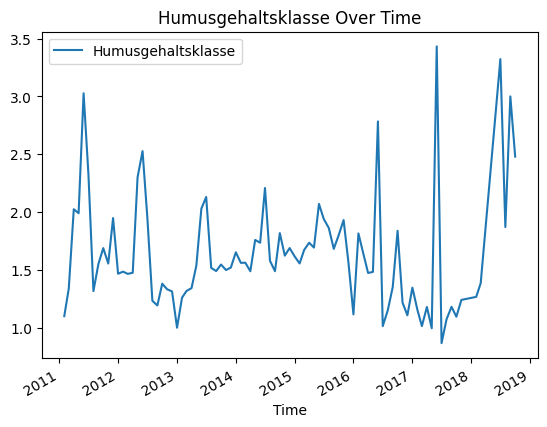

In [5]:
# Group by year and month, calculate the mean of Humusgehaltsklasse
df_grouped = df.groupby(['Probenahme_Jahr', 'Probenahme_Monat'])['Humusgehaltsklasse'].mean().reset_index()

# Create a time column for plotting
df_grouped['Time'] = pd.to_datetime(df_grouped['Probenahme_Jahr'].astype(str) + '-' + df_grouped['Probenahme_Monat'].astype(str))

# Plot the data
df_grouped.plot(x='Time', y='Humusgehaltsklasse', kind='line', title='Humusgehaltsklasse Over Time')

<Axes: title={'center': 'Karbonat Over Time'}, xlabel='Time'>

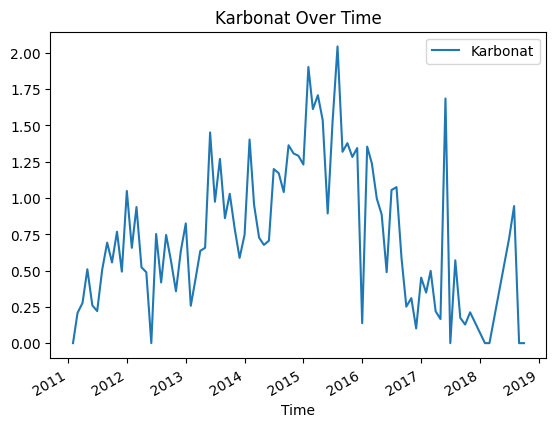

In [7]:
# Group by year and month, calculate the mean of Humusgehaltsklasse
df_grouped = df.groupby(['Probenahme_Jahr', 'Probenahme_Monat'])['Karbonat'].mean().reset_index()

# Create a time column for plotting
df_grouped['Time'] = pd.to_datetime(df_grouped['Probenahme_Jahr'].astype(str) + '-' + df_grouped['Probenahme_Monat'].astype(str))

# Plot the data
df_grouped.plot(x='Time', y='Karbonat', kind='line', title='Karbonat Over Time')

In [18]:
df["anor_carbon"].unique()

array([ 0.        ,  0.08      ,  0.062     , ..., 20.088     ,
       19.03      , 13.23833333], shape=(1177,))

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3104 entries, 0 to 3103
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PointID             3104 non-null   int64  
 1   Karbonat            3104 non-null   float64
 2   Humusgehaltsklasse  3104 non-null   float64
 3   pH_H2O              3104 non-null   float64
 4   EC_H2O              3104 non-null   float64
 5   pH_CaCl2            3104 non-null   float64
 6   total_carbon        3104 non-null   float64
 7   org_carbon          3104 non-null   float64
 8   anor_carbon         3104 non-null   float64
 9   total_nitrogen      3104 non-null   float64
 10  total_sulfur        447 non-null    float64
 11  Mn_Ox               306 non-null    float64
 12  Fe_Ox               306 non-null    float64
 13  Al_Ox               306 non-null    float64
 14  Mn_Di               241 non-null    float64
 15  Fe_Di               241 non-null    float64
 16  Al_Di 

<Axes: title={'center': 'Progress of Total Carbon, Total Nitrogen, and Total Sulfur Over Time'}, xlabel='Time'>

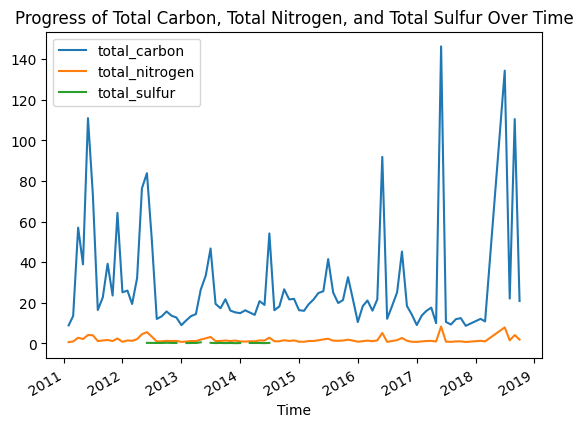

In [20]:
# Group by year and month, calculate the mean of total_carbon, total_nitrogen, and total_sulfur
df_grouped = df.groupby(['Probenahme_Jahr', 'Probenahme_Monat'])[['total_carbon', 'total_nitrogen', 'total_sulfur']].mean().reset_index()

# Create a time column for plotting
df_grouped['Time'] = pd.to_datetime(df_grouped['Probenahme_Jahr'].astype(str) + '-' + df_grouped['Probenahme_Monat'].astype(str))

# Plot the data
df_grouped.plot(x='Time', y=['total_carbon', 'total_nitrogen', 'total_sulfur'], kind='line', title='Progress of Total Carbon, Total Nitrogen, and Total Sulfur Over Time')

In [5]:
correlation = df['Karbonat'].corr(df['total_carbon'])
print(f"Correlation between Karbonat and total_carbon: {correlation}")

Correlation between Karbonat and total_carbon: 0.11867050570411539


In [8]:
# Descriptive analysis of total_carbon, total_nitrogen, and total_sulfur
descriptive_stats = df[['total_carbon', 'total_nitrogen', 'total_sulfur']].describe()
print(descriptive_stats)

       total_carbon  total_nitrogen  total_sulfur
count   3104.000000     3104.000000    447.000000
mean      24.032250        1.466902      0.195575
std       53.052830        2.515011      0.291807
min        2.133333        0.132000      0.060000
25%        6.959583        0.640000      0.117873
50%       10.784167        0.883095      0.147200
75%       19.090000        1.360000      0.210369
max      486.162857       29.154286      5.451250


In [10]:
df2 = pd.read_csv('data/workedon_files/LABORDATEN.csv')

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17189 entries, 0 to 17188
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PointID                  17189 non-null  int64  
 1   Bundesland               17189 non-null  object 
 2   Tiefenstufe Obergrenze   17189 non-null  int64  
 3   Tiefenstufe Untergrenze  17189 non-null  int64  
 4   Horizont Untergrenze     17186 non-null  float64
 5   gS                       16708 non-null  float64
 6   mS                       16708 non-null  float64
 7   fS                       16708 non-null  float64
 8   gU                       16708 non-null  float64
 9   mU                       16708 non-null  float64
 10  fU                       16708 non-null  float64
 11  Sand                     16708 non-null  float64
 12  Schluff                  16708 non-null  float64
 13  Ton                      16708 non-null  float64
 14  Bodenart              

In [13]:
df2['TOC'].describe()

count    17189.000000
mean        22.210774
std         65.579374
min          0.080000
25%          2.420000
50%          7.210000
75%         15.900000
max        582.890000
Name: TOC, dtype: float64

<Axes: title={'center': 'Total Carbon non mean'}, xlabel='Index', ylabel='TOC'>

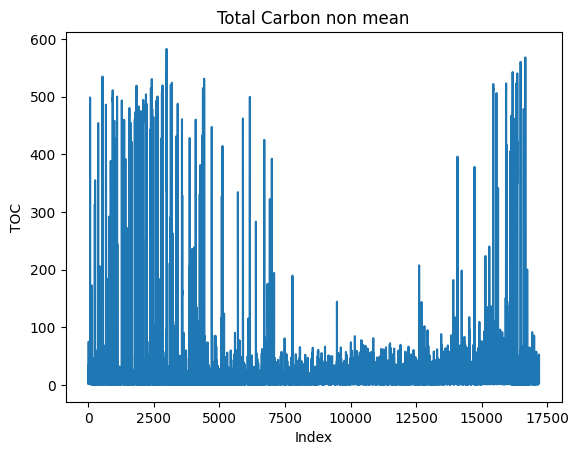

In [16]:
df2['TOC'].plot(kind='line', title='Total Carbon non mean', ylabel='TOC', xlabel='Index')

<Axes: title={'center': 'Total Carbon MEAN'}, xlabel='Index', ylabel='Total Carbon'>

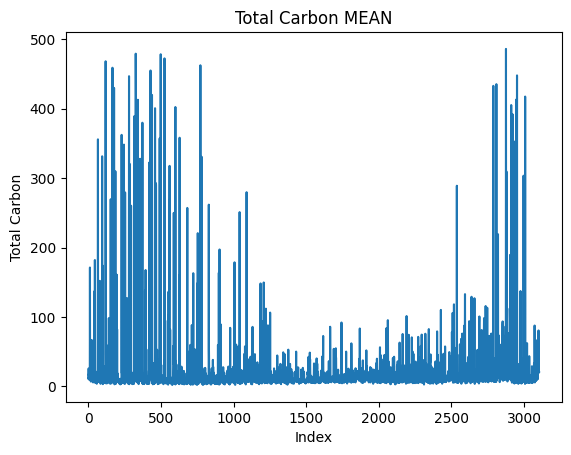

In [17]:
df['total_carbon'].plot(kind='line', title='Total Carbon MEAN', ylabel='Total Carbon', xlabel='Index')

<Axes: title={'center': 'Wassergehalt Over Time'}, xlabel='Time', ylabel='Wassergehalt'>

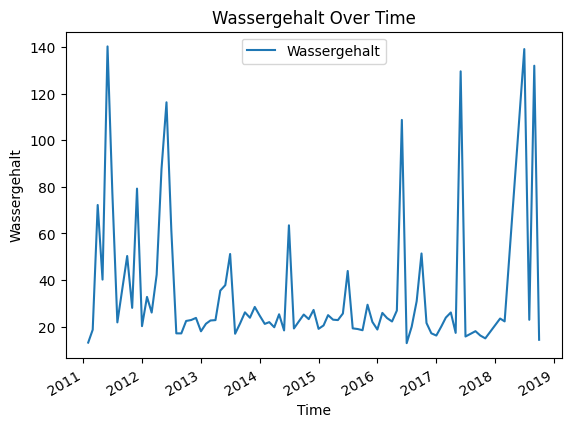

In [18]:
# Group by year and month, calculate the mean of Wassergehalt
df_grouped = df.groupby(['Probenahme_Jahr', 'Probenahme_Monat'])['Wassergehalt'].mean().reset_index()

# Create a time column for plotting
df_grouped['Time'] = pd.to_datetime(df_grouped['Probenahme_Jahr'].astype(str) + '-' + df_grouped['Probenahme_Monat'].astype(str))

# Plot the data
df_grouped.plot(x='Time', y='Wassergehalt', kind='line', title='Wassergehalt Over Time', ylabel='Wassergehalt', xlabel='Time')